In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D
from keras.models import Model
from keras import backend as K
import tensorflow as tf
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from skimage.color import rgb2grey
import os
#print(os.listdir("../input/flowers-recognition/flowers/flowers/rose"))

# Any results you write to the current directory are saved as output.

In [15]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,device_count = {'CPU' : 1, 'GPU' : 0}))
K.set_session(sess)

In [16]:
flowerPath = "../flowers/flowers/"

datagen = ImageDataGenerator(rescale=(1/255))
flowerGen = datagen.flow_from_directory(flowerPath,batch_size=1,target_size=(512,512),class_mode='binary')

Found 4323 images belonging to 5 classes.


In [29]:
# Returns a tuple (greyscale_img,rgb_img)
def flower_dat_gen(classNum,gen):
    for img in gen:
        if(img[1][0] == classNum):
            #print(img[0][0].shape)
            a = np.random.binomial(9, 0.1, 512*512)
            print(a.shape)
            yield a,a
            #yield (rgb2grey(img[0][0]).flatten(),rgb2grey(img[0][0]).flatten())
            #yield rgb2grey(img[0][0]).flatten(),img[0][0]
def test1():
    a = np.random.binomial(9, 0.1, 512*512)
    yield (a,a)
    #for i in range(10):
    
def visRes(predictOUt):
    plt.figure(figsize=(10,10))
    r = np.array(predictOUt)[0,:,:][0]
    g = np.array(predictOUt)[1,:,:][0]
    b = np.array(predictOUt)[2,:,:][0]
    plt.imshow(np.dstack((r,g,b))[0,:,:].reshape((512,512,3)))
    plt.show()

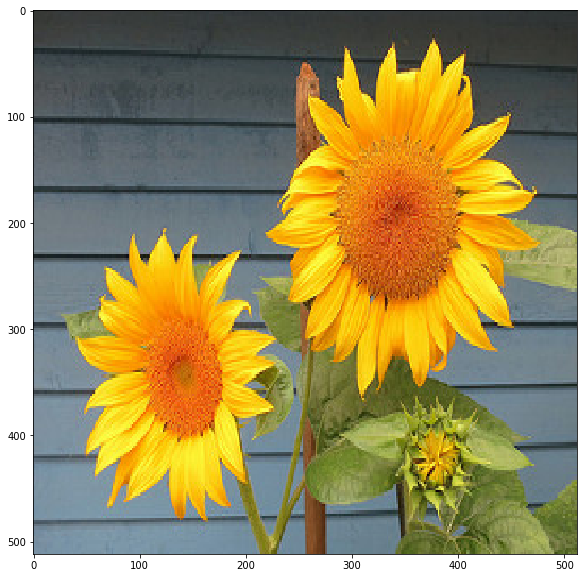

In [13]:
plt.figure(figsize=(10,10))
img = flowerGen[6][0][0]
plt.imshow(img)
plt.show()
greyImg = rgb2grey(img).flatten()
#greyImg.shape

In [ ]:
for i in flower_dat_gen(0,flowerGen):
    print(len(i))
    print(i[0].shape)
    break

In [ ]:
flowerGen[6][0][0].flatten().shape

In [ ]:
plt.imshow( rgb2grey( flowerGen[6][0][0][0:512][0:512] ),cmap='gray' )
flowerGen[6][0][0][0:512][0:512][0].shape

In [ ]:
simpleAE(32,512*512)
autoencoder.fit_generator(fixed_generator(catGen),samples_per_epoch=12500,verbose=1,epochs=10)

In [64]:
def convAutoEnc(encoding_dim = 32, input_dim = 512*512):
    input_img = Input(shape=(input_dim,)) 

    encoded1 = Dense(encoding_dim, activation='relu')(input_img)
    encoded2 = Dense(encoding_dim, activation='relu')(encoded1)
    encoded = Dense(encoding_dim, activation='relu')(encoded2)
 
    decoded_r = Dense(input_dim,activation='relu')(encoded1)
    decoded_g = Dense(input_dim,activation='relu')(encoded2)
    decoded_b = Dense(input_dim,activation='relu')(encoded)

    # this model maps an input to its reconstruction
    return Model(input_img, outputs=[decoded_r,decoded_g,decoded_b])



In [65]:
ae1 = convAutoEnc(5)
ae1.compile(optimizer='adadelta', loss='mean_squared_error',loss_weights=[1, 1, 1])
#ae1.summary()

In [66]:
#ae1.fit_generator(flower_dat_gen(0,flowerGen),samples_per_epoch=100,verbose=1,epochs=1)
#ae1.fit_generator(test1(),samples_per_epoch=100,verbose=1,epochs=1)
img = flowerGen[6][0][0]
img2 = flowerGen[5][0][0]
img3 = flowerGen[4][0][0]
greyImg = rgb2grey(img).flatten()
ae1.fit(greyImg.reshape(1,262144), [img[:,:,0].reshape(1,262144),img[:,:,1].reshape(1,262144),img[:,:,2].reshape(1,262144)], epochs=100,batch_size=1,verbose=1)

Epoch 1/100
1/1 [==============================] - 43s 43s/step - loss: 0.7375 - dense_48_loss: 0.2296 - dense_49_loss: 0.2091 - dense_50_loss: 0.2988
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 7.4229 - dense_48_loss: 2.8093 - dense_49_loss: 3.1745 - dense_50_loss: 1.4391
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.6148 - dense_48_loss: 0.1922 - dense_49_loss: 0.1835 - dense_50_loss: 0.2391
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.7466 - dense_48_loss: 0.2331 - dense_49_loss: 0.2124 - dense_50_loss: 0.3010
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.7463 - dense_48_loss: 0.2330 - dense_49_loss: 0.2124 - dense_50_loss: 0.3009
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.7458 - dense_48_loss: 0.2330 - dense_49_loss: 0.2122 - dense_50_loss: 0.3006
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.7453 - dense_48_loss: 0.2329 - d

Epoch 56/100
1/1 [==============================] - 1s 1s/step - loss: 0.6819 - dense_48_loss: 0.2253 - dense_49_loss: 0.1983 - dense_50_loss: 0.2582
Epoch 57/100
1/1 [==============================] - 1s 1s/step - loss: 0.6794 - dense_48_loss: 0.2251 - dense_49_loss: 0.1980 - dense_50_loss: 0.2562
Epoch 58/100
1/1 [==============================] - 1s 1s/step - loss: 0.6768 - dense_48_loss: 0.2250 - dense_49_loss: 0.1977 - dense_50_loss: 0.2541
Epoch 59/100
1/1 [==============================] - 1s 1s/step - loss: 0.6741 - dense_48_loss: 0.2248 - dense_49_loss: 0.1974 - dense_50_loss: 0.2519
Epoch 60/100
1/1 [==============================] - 1s 1s/step - loss: 0.6713 - dense_48_loss: 0.2247 - dense_49_loss: 0.1970 - dense_50_loss: 0.2496
Epoch 61/100
1/1 [==============================] - 1s 1s/step - loss: 0.6684 - dense_48_loss: 0.2245 - dense_49_loss: 0.1967 - dense_50_loss: 0.2472
Epoch 62/100
1/1 [==============================] - 1s 1s/step - loss: 0.6655 - dense_48_loss: 0.224

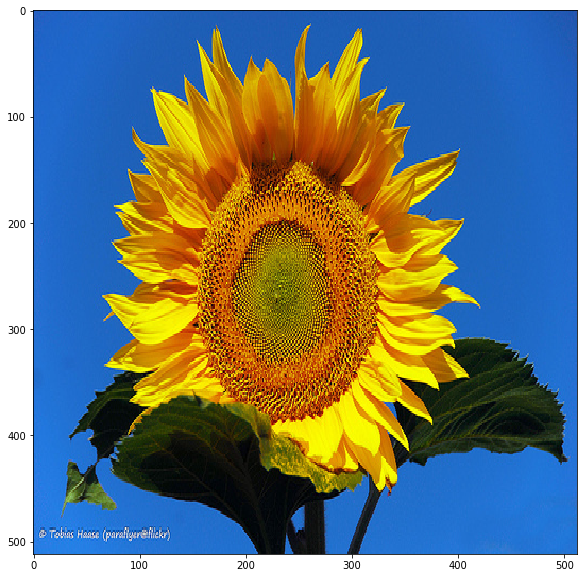

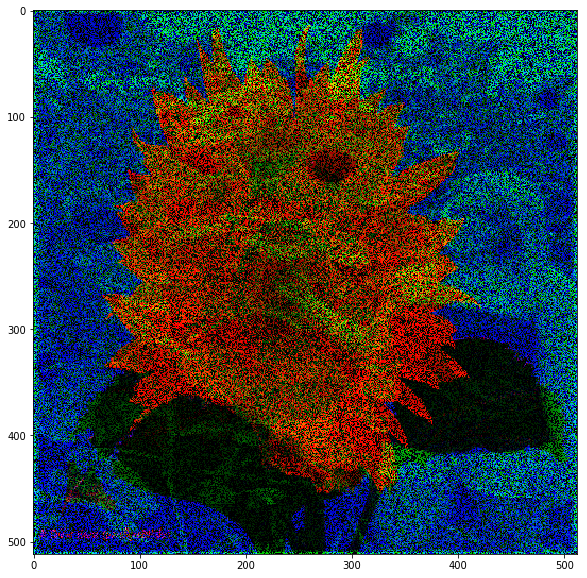

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
visRes( ae1.predict(greyImg.reshape(1,262144)) )

In [ ]:
def autoEnc2(encoding_dim = 32, input_dim = 512*512):
    input_img = Input(shape=(input_dim,)) 
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    #decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(encoded)
    decoded_r_1 = Dense(encoding_dim*2,activation='relu')(encoded)
    decoded_g_1 = Dense(encoding_dim*2,activation='relu')(encoded)
    decoded_b_1 = Dense(encoding_dim*2,activation='relu')(encoded)
    
    decoded_r_2 = Dense(encoding_dim*3,activation='relu')(decoded_r_1)
    decoded_g_2 = Dense(encoding_dim*3,activation='relu')(decoded_g_1)
    decoded_b_2 = Dense(encoding_dim*3,activation='relu')(decoded_b_1)
    
    decoded_r_3 = Dense(encoding_dim*4,activation='relu')(decoded_r_2)
    decoded_g_3 = Dense(encoding_dim*4,activation='relu')(decoded_g_2)
    decoded_b_3 = Dense(encoding_dim*4,activation='relu')(decoded_b_2)
    
    decoded_r = Dense(input_dim,activation='relu')( decoded_r_3 )
    decoded_g = Dense(input_dim,activation='relu')(decoded_g_3)
    decoded_b = Dense(input_dim,activation='relu')(decoded_b_3 )


    # this model maps an input to its reconstruction
    return Model(input_img, outputs=[decoded_r,decoded_g,decoded_b])

In [ ]:
ae2 = autoEnc2(100)
ae2.compile(optimizer='adadelta', loss='mean_squared_error',loss_weights=[1., 0.5, 0.5])

In [ ]:
img = flowerGen[6][0][0]
greyImg = rgb2grey(img).flatten()
ae2.fit(greyImg.reshape(1,262144), [img[:,:,0].reshape(1,262144),img[:,:,1].reshape(1,262144),img[:,:,2].reshape(1,262144)], epochs=100,batch_size=1,verbose=1)

In [ ]:
img = flowerGen[6][0][0]
greyImg = rgb2grey(img).flatten()
plt.figure(figsize=(10,10))
plt.imshow(img)
visRes( ae2.predict(greyImg.reshape(1,262144)) )

In [ ]:
def autoEnc3(encoding_dim = 32, input_dim = 512*512):
    input_img = Input(shape=(input_dim,)) 
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim*4, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    #decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(encoded)
    d1 = Dense(encoding_dim*3,activation='relu')(encoded)
    d2 = Dense(encoding_dim*2,activation='relu')(d1)
    d3 = Dense(encoding_dim*1,activation='relu')(d2)
    
    decoded_r = Dense(input_dim,activation='relu')( d3 )
    decoded_g = Dense(input_dim,activation='relu')( d3 )
    decoded_b = Dense(input_dim,activation='relu')( d3 )


    # this model maps an input to its reconstruction
    return Model(input_img, outputs=[decoded_r,decoded_g,decoded_b])

In [ ]:
ae3 = autoEnc3(200)
ae3.compile(optimizer='adadelta', loss='mean_squared_error')

In [ ]:
img = flowerGen[6][0][0]
greyImg = rgb2grey(img).flatten()
ae3.fit(greyImg.reshape(1,262144), [img[:,:,0].reshape(1,262144),img[:,:,1].reshape(1,262144),img[:,:,2].reshape(1,262144)], epochs=100,batch_size=1,verbose=1)

In [ ]:
img = flowerGen[6][0][0]
plt.figure(figsize=(10,10))
plt.imshow(img)
greyImg = rgb2grey(img).flatten()
visRes( ae3.predict(greyImg.reshape(1,262144)) )

In [ ]:
def singleChanLearner(encoding_dim = 32, input_dim = 512*512):
    input_img = Input(shape=(input_dim,)) 
    e1 = Dense(encoding_dim, activation='relu')(input_img)
    e2 = Dense(encoding_dim, activation='relu')(input_img)
    decoded = Dense(input_dim,activation='relu')( e2 )
    
    return Model(input_img, decoded)

In [ ]:
net2 = singleChanLearner(300)
net2.compile(optimizer='adadelta', loss='poisson')

In [ ]:
img = flowerGen[6][0][0]
greyImg = rgb2grey(img).flatten()
net2.fit(greyImg.reshape(1,262144), img[:,:,0].reshape(1,262144), epochs=100,batch_size=1,verbose=1)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow((g/r).reshape(512,512),cmap="gray")

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(((r-b)/g).reshape(512,512),cmap="gray")

In [ ]:
img = flowerGen[1][0][0]
plt.figure(figsize=(10,10))
plt.imshow(img)
greyImg2 = rgb2grey(img).flatten()

In [ ]:
res = ae1.predict(greyImg2.reshape(1,262144))
plt.figure(figsize=(10,10))
r = np.array(res)[0,:,:][0]
g = np.array(res)[1,:,:][0]
b = np.array(res)[2,:,:][0]
plt.imshow(np.dstack((r,g,b))[0,:,:].reshape((512,512,3)))